In [27]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
# chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")

# Initialize WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Open The Infatuation Best Restaurants Chicago article
url = "https://www.theinfatuation.com/chicago/guides/best-restaurants-chicago"
driver.get(url)

# Wait until restaurant cards are present
wait = WebDriverWait(driver, 30)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '[data-testid="venue-venueCard"]')))

# Let the content settle a little more
time.sleep(5)

# Find all restaurant blocks
restaurant_elements = driver.find_elements(By.CSS_SELECTOR, '[data-testid="venue-venueCard"]')

# List to hold restaurant data
restaurants = []

# Extract info from each card
for elem in restaurant_elements[:25]:
    try:
        name = elem.find_element(By.CSS_SELECTOR, '[data-testid="venue-title"]').text.strip()
    except:
        name = 'N/A'

    try:
        # All text in caption details
        full_text = elem.find_element(By.CSS_SELECTOR, '[data-testid="caption-captionDetails"]').text.strip()
        lines = [line.strip() for line in full_text.split('\n') if line.strip() and not line.strip().startswith("$")]
    except:
        lines = []

    try:
        bold_prices = elem.find_elements(By.CSS_SELECTOR, 'span.css-1oehroq')
        price = "$" * len(bold_prices)
    except:
        price = ''

    address = lines[0] if len(lines) > 0 else ''
    cuisine = lines[1] if len(lines) > 1 else ''
    neighborhood = lines[2] if len(lines) > 2 else ''

    restaurants.append({
        "Name": name,
        "Address": address,
        "Price": price,
        "Cuisine": cuisine,
        "Neighborhood": neighborhood
    })

# Convert to DataFrame
df = pd.DataFrame(restaurants)

# Print the DataFrame
print(df)

# Close the browser
driver.quit()

                                Name  \
0                             Oriole   
1                             Kasama   
2                              Schwa   
3                   Kyoten Next Door   
4                   Xocome Antojeria   
5                             Alinea   
6                         Monteverde   
7                 Mariscos San Pedro   
8                              Galit   
9   J.P. Graziano Grocery & Sub Shop   
10                    Akahoshi Ramen   
11                            Obelix   
12                    The Momo World   
13                  Maxwells Trading   
14                         Bavette's   
15                          Valhalla   
16                        JM Seafood   
17                Birrieria Zaragoza   
18        Daisy's Po' Boy and Tavern   
19                            Anelya   
20                              Avec   
21                             Elske   
22          Milly's Pizza In The Pan   
23          Alegrias Seafood Chicago   


In [29]:
df["Name"] = df["Name"].str.upper()
print(df)
display(df)


                                Name  \
0                             ORIOLE   
1                             KASAMA   
2                              SCHWA   
3                   KYOTEN NEXT DOOR   
4                   XOCOME ANTOJERIA   
5                             ALINEA   
6                         MONTEVERDE   
7                 MARISCOS SAN PEDRO   
8                              GALIT   
9   J.P. GRAZIANO GROCERY & SUB SHOP   
10                    AKAHOSHI RAMEN   
11                            OBELIX   
12                    THE MOMO WORLD   
13                  MAXWELLS TRADING   
14                         BAVETTE'S   
15                          VALHALLA   
16                        JM SEAFOOD   
17                BIRRIERIA ZARAGOZA   
18        DAISY'S PO' BOY AND TAVERN   
19                            ANELYA   
20                              AVEC   
21                             ELSKE   
22          MILLY'S PIZZA IN THE PAN   
23          ALEGRIAS SEAFOOD CHICAGO   


,Name,Address,Price,Cuisine,Neighborhood
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET
1,KASAMA,"1001 N WINCHESTER AVE CHICAGO, ILLINOIS 60622",$$,FILIPINO,UKRAINIAN VILLAGE
2,SCHWA,"1466 N ASHLAND AVE CHICAGO, IL 60622",$$$$,EXPERIMENTAL,WICKER PARK
3,KYOTEN NEXT DOOR,"2513 W ARMITAGE AVE CHICAGO, IL 60647",$$$$,JAPANESE,LOGAN SQUARE
4,XOCOME ANTOJERIA,"5200 SOUTH ARCHER AVENUE CHICAGO, IL 60632",$$,MEXICAN,ARCHER HEIGHTS
5,ALINEA,"1723 N HALSTED ST CHICAGO, IL 60614",$$$$,EXPERIMENTAL,LINCOLN PARK
6,MONTEVERDE,"1020 W MADISON ST CHICAGO, IL 60607",$$$,ITALIAN,WEST LOOP
7,MARISCOS SAN PEDRO,"1227 W 18TH ST CHICAGO, ILLINOIS 60608",$$,MEXICAN,PILSEN
8,GALIT,"2429 N LINCOLN AVE CHICAGO, ILLINOIS 60614",$$$,MIDDLE EASTERN,LINCOLN PARK
9,J.P. GRAZIANO GROCERY & SUB SHOP,"901 W RANDOLPH ST CHICAGO, IL 60607",$,AMERICAN,WEST LOOP


In [35]:
df.to_csv("infatuation_chicago_restaurants.csv", index=False)

In [37]:
inspections_df = pd.read_csv("Food_Inspections_20250331.csv")

#rename
inspections_df.rename(columns={"DBA Name": "Name"}, inplace=True)

merged_df = pd.merge(df, inspections_df, how="left", on="Name")
merged_df

,Name,Address_x,Price,Cuisine,Neighborhood,Inspection ID,AKA Name,License #,Facility Type,Risk,...,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2575075.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/27/2023,Canvass Re-Inspection,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
1,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510712.0,ORIOLE,2781336.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/02/2021,License,Not Ready,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
2,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2573815.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/06/2023,Non-Inspection,No Entry,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
3,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2574666.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/20/2023,Canvass,Fail,54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
4,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510742.0,ORIOLE,2418113.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/03/2021,Canvass,Out of Business,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,1975412.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/15/2016,License,Pass,NaN,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
186,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,1975425.0,ELSKE,2458130.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/15/2016,License,Pass,NaN,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
187,MILLY'S PIZZA IN THE PAN,"1005 W ARGYLE ST CHICAGO, ILLINOIS 60647",$$,PIZZA,UPTOWN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,ALEGRIAS SEAFOOD CHICAGO,"1024 N. ASHLAND AVE. CHICAGO, IL 60622",$$$,MEXICAN,WICKER PARK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop all rows with any NaN values in-place
merged_df.dropna(inplace=True)

# Print the DataFrame to verify the changes
merged_df

,Name,Address_x,Price,Cuisine,Neighborhood,Inspection ID,AKA Name,License #,Facility Type,Risk,...,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2575075.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/27/2023,Canvass Re-Inspection,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
3,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2574666.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/20/2023,Canvass,Fail,54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
5,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510727.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/03/2021,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
11,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2151058.0,ORIOLE,2418112.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,03/27/2018,Canvass,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
12,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2159238.0,ORIOLE,2418112.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,03/30/2018,Canvass Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2585780.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/27/2023,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
178,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2523298.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,07/28/2021,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
180,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2213302.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,08/22/2018,Suspected Food Poisoning,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
182,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2213442.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,08/24/2018,Suspected Food Poisoning,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"


In [135]:
merged_df.to_csv("merged_cleaned.csv", index=False)


# Univariate Analysis for Question 1

Top 10 Cuisine Types:
Cuisine
AMERICAN        43
EXPERIMENTAL    12
MEXICAN          9
ITALIAN          9
NEPALI           8
SCANDINAVIAN     7
JAPANESE         6
FILIPINO         5
UKRAINIAN        2
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1061519330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="muted")


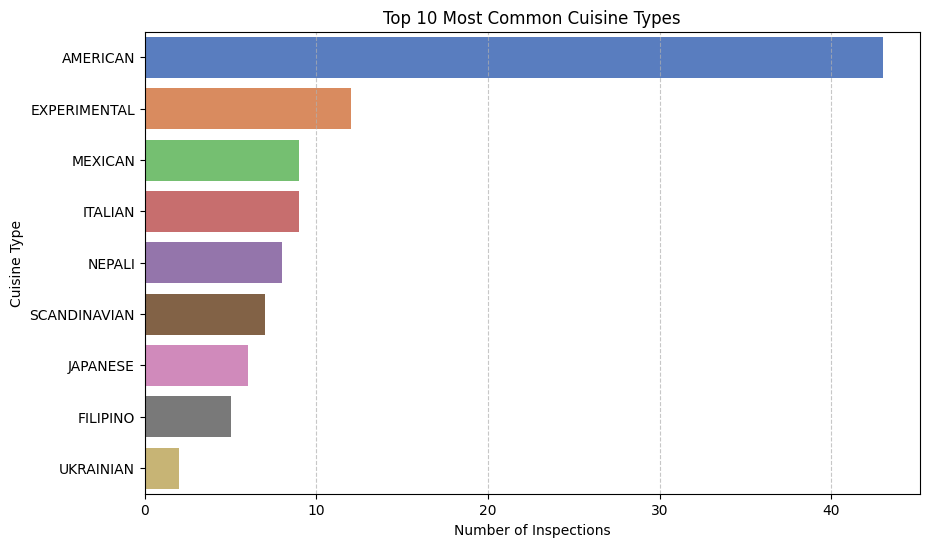


Summary of Critical Violations per Inspection:
count    101.000000
mean       0.059406
std        0.310541
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Critical_Violation_Count, dtype: float64


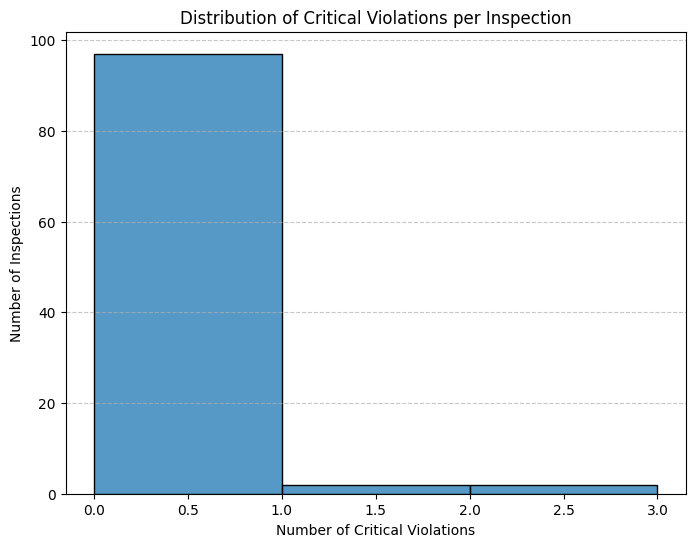


Inspection Results Summary:
Results
Pass                  52
Pass w/ Conditions    26
Fail                  23
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1061519330.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="Results", order=merged_df["Results"].value_counts().index, palette="pastel")


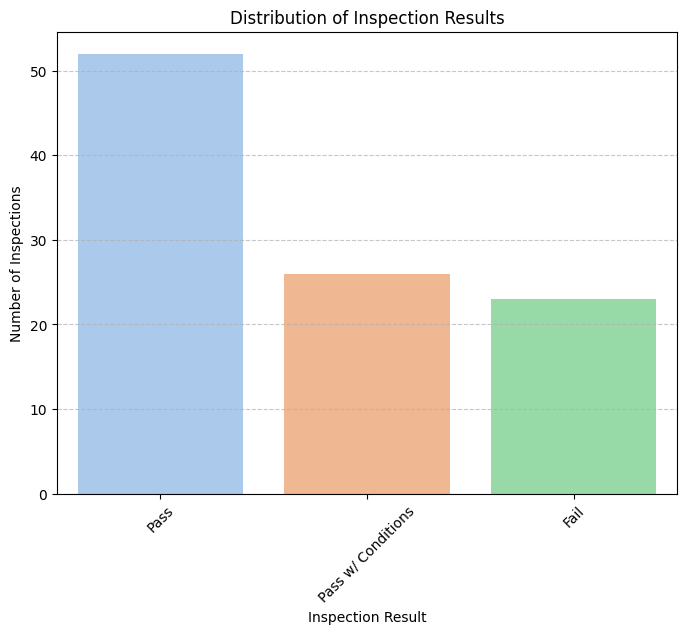

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- UNIVARIATE 1: Cuisine Type Distribution -----------------

# Top 10 Cuisine Types
top_cuisines = merged_df["Cuisine"].value_counts().head(10)
print("Top 10 Cuisine Types:")
print(top_cuisines)

# Bar plot for Cuisine Types
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="muted")
plt.title("Top 10 Most Common Cuisine Types")
plt.xlabel("Number of Inspections")
plt.ylabel("Cuisine Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- UNIVARIATE 2: Critical Violation Counts -----------------

# Count 'Critical' keywords in Violations text
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Summary of Critical Violations
print("\nSummary of Critical Violations per Inspection:")
print(merged_df["Critical_Violation_Count"].describe())

# Histogram of Critical Violations
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Critical_Violation_Count"], bins=range(0, merged_df["Critical_Violation_Count"].max()+2), kde=False)
plt.title("Distribution of Critical Violations per Inspection")
plt.xlabel("Number of Critical Violations")
plt.ylabel("Number of Inspections")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ----------------- UNIVARIATE 3: Results Distribution (Pass/Fail) -----------------

# Inspection Results Distribution
print("\nInspection Results Summary:")
print(merged_df["Results"].value_counts())

# Bar plot of Results
plt.figure(figsize=(8,6))
sns.countplot(data=merged_df, x="Results", order=merged_df["Results"].value_counts().index, palette="pastel")
plt.title("Distribution of Inspection Results")
plt.xlabel("Inspection Result")
plt.ylabel("Number of Inspections")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




# Birative Analysis for Question 1


Top 10 Cuisines by Average Critical Violations:
Cuisine
ITALIAN         0.222222
AMERICAN        0.093023
EXPERIMENTAL    0.000000
FILIPINO        0.000000
JAPANESE        0.000000
MEXICAN         0.000000
NEPALI          0.000000
SCANDINAVIAN    0.000000
UKRAINIAN       0.000000
Name: Critical_Violation_Count, dtype: float64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1934462560.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_critical_avg.head(10), y=cuisine_critical_avg.head(10).index, palette="rocket")


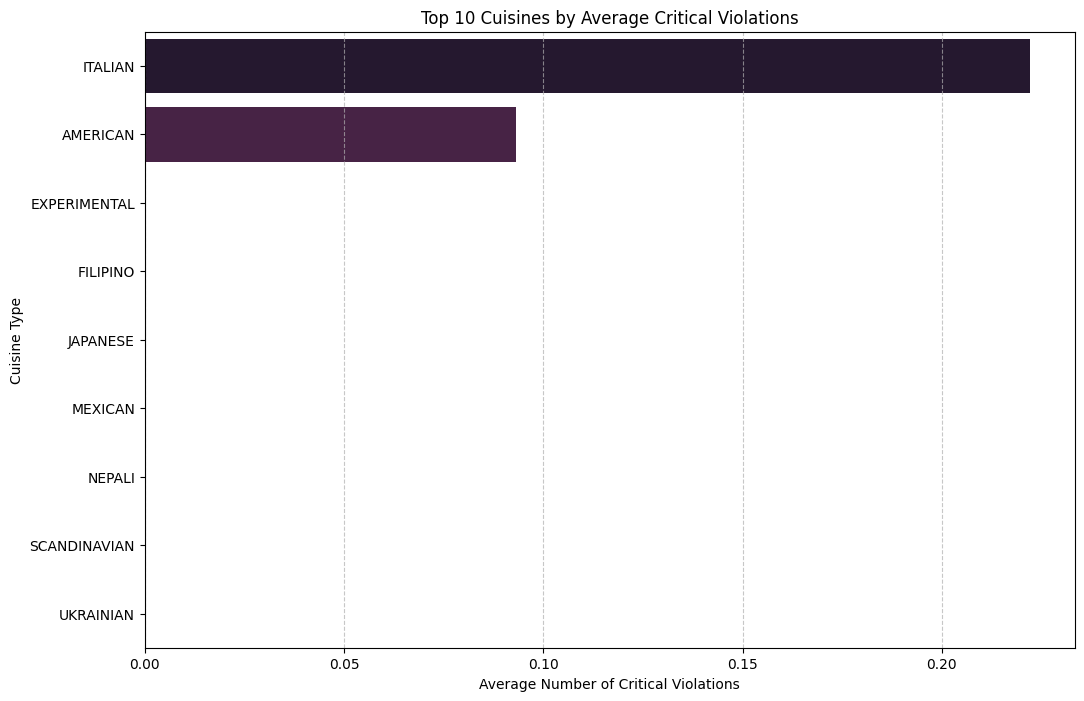


Cuisine Type vs Inspection Result Proportions (Top 10 Cuisines):
Results           Fail      Pass  Pass w/ Conditions
Cuisine                                             
AMERICAN      0.186047  0.651163            0.162791
EXPERIMENTAL  0.250000  0.083333            0.666667
FILIPINO      0.200000  0.600000            0.200000
ITALIAN       0.333333  0.444444            0.222222
JAPANESE      0.333333  0.500000            0.166667
MEXICAN       0.333333  0.444444            0.222222
NEPALI        0.250000  0.500000            0.250000
SCANDINAVIAN  0.142857  0.428571            0.428571
UKRAINIAN     0.000000  1.000000            0.000000


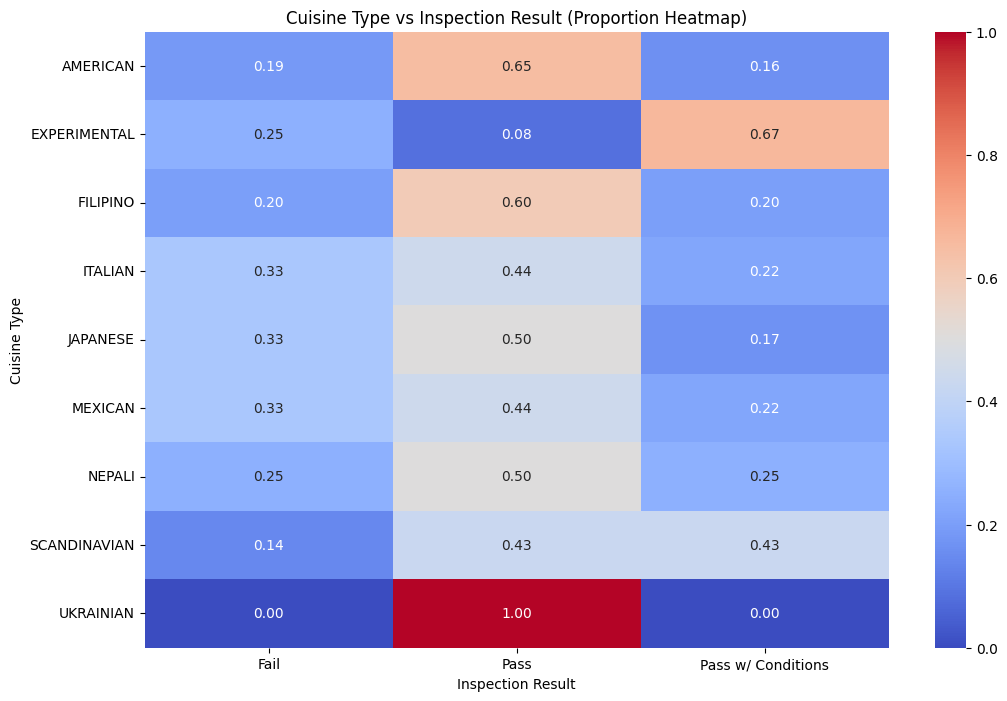

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Create Critical Violation count
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# ----------------- BIVARIATE 1: Cuisine Type vs Average Critical Violations -----------------

# Group by Cuisine and calculate average number of critical violations
cuisine_critical_avg = merged_df.groupby("Cuisine")["Critical_Violation_Count"].mean().sort_values(ascending=False)

# Print Top 10
print("Top 10 Cuisines by Average Critical Violations:")
print(cuisine_critical_avg.head(10))

# Bar plot: Average Critical Violations by Cuisine
plt.figure(figsize=(12,8))
sns.barplot(x=cuisine_critical_avg.head(10), y=cuisine_critical_avg.head(10).index, palette="rocket")
plt.title("Top 10 Cuisines by Average Critical Violations")
plt.xlabel("Average Number of Critical Violations")
plt.ylabel("Cuisine Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- BIVARIATE 2: Cuisine Type vs Inspection Results -----------------

# Crosstab Cuisine vs Inspection Result
cuisine_results_crosstab = pd.crosstab(merged_df["Cuisine"], merged_df["Results"], normalize='index')

# Print Top 10
print("\nCuisine Type vs Inspection Result Proportions (Top 10 Cuisines):")
print(cuisine_results_crosstab.head(10))

# Heatmap: Cuisine vs Inspection Result
plt.figure(figsize=(12,8))
sns.heatmap(cuisine_results_crosstab.head(10), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cuisine Type vs Inspection Result (Proportion Heatmap)")
plt.xlabel("Inspection Result")
plt.ylabel("Cuisine Type")
plt.show()

# 2 visualizations for Q

# Machine Learning for Question 1


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Create binary Pass/Fail label
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Encode Cuisine into numbers
le_cuisine = LabelEncoder()
merged_df["Cuisine_encoded"] = le_cuisine.fit_transform(merged_df["Cuisine"].astype(str))

# Features and target
X = merged_df[["Cuisine_encoded"]]
y = merged_df["Pass_Fail"]

# Split data with stratification to avoid single-class issue
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        24

    accuracy                           0.77        31
   macro avg       0.39      0.50      0.44        31
weighted avg       0.60      0.77      0.68        31


Confusion Matrix:
[[ 0  7]
 [ 0 24]]


/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
